In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi

In [25]:
hdm = pd.read_csv('HeartDiseaseMortality2007_2011.csv')

In [26]:
euro = pd.read_csv('AmergeEuro.csv')

In [14]:
mergeTable = pd.read_csv('mergedTable.csv')

In [15]:
mergeTable.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
mergeTable.head()

,Entity,Year,Animal protein,Plant protein,Total Fat,Total Carbohydrates,Total Protein,Vegetable Oil,Health Care Index,Deaths,VO%
0,France,2007,285.96,156.44,1443.69,1579.91,442.40,507.945205,65.38,112.366845,35.183814
1,France,2008,285.12,165.20,1505.97,1594.71,450.32,517.808219,65.38,110.082662,34.383701
2,France,2009,285.36,159.40,1485.99,1599.25,444.76,530.136986,65.38,107.888487,35.675677
3,France,2010,283.84,168.80,1471.05,1612.31,452.64,520.273973,65.38,104.153629,35.367525
4,France,2011,281.64,165.64,1452.42,1614.30,447.28,517.808219,65.38,101.182683,35.651411


In [17]:
mt = mergeTable.copy()

In [18]:
mt.head()

,Entity,Year,Animal protein,Plant protein,Total Fat,Total Carbohydrates,Total Protein,Vegetable Oil,Health Care Index,Deaths,VO%
0,France,2007,285.96,156.44,1443.69,1579.91,442.40,507.945205,65.38,112.366845,35.183814
1,France,2008,285.12,165.20,1505.97,1594.71,450.32,517.808219,65.38,110.082662,34.383701
2,France,2009,285.36,159.40,1485.99,1599.25,444.76,530.136986,65.38,107.888487,35.675677
3,France,2010,283.84,168.80,1471.05,1612.31,452.64,520.273973,65.38,104.153629,35.367525
4,France,2011,281.64,165.64,1452.42,1614.30,447.28,517.808219,65.38,101.182683,35.651411


##### Pivoting Data
<li>Data: dataframe</li>
<li>Values: values to summarize</li>
<li>Index: Rows</li>


In [21]:
mt.head()

,Entity,Year,Animal protein,Plant protein,Total Fat,Total Carbohydrates,Total Protein,Vegetable Oil,Health Care Index,Deaths,VO%
0,France,2007,285.96,156.44,1443.69,1579.91,442.40,507.945205,65.38,112.366845,35.183814
1,France,2008,285.12,165.20,1505.97,1594.71,450.32,517.808219,65.38,110.082662,34.383701
2,France,2009,285.36,159.40,1485.99,1599.25,444.76,530.136986,65.38,107.888487,35.675677
3,France,2010,283.84,168.80,1471.05,1612.31,452.64,520.273973,65.38,104.153629,35.367525
4,France,2011,281.64,165.64,1452.42,1614.30,447.28,517.808219,65.38,101.182683,35.651411


In [27]:
vog = mt.drop(mt.columns.difference(['Entity', 'Year', 'Vegetable Oil']), axis=1)

In [28]:
vog.head()

,Entity,Year,Vegetable Oil
0,France,2007,507.945205
1,France,2008,517.808219
2,France,2009,530.136986
3,France,2010,520.273973
4,France,2011,517.808219


In [24]:
vog = pd.melt(vog, id_vars=['Year'])

In [20]:
vog.head()

NameError: name 'vog' is not defined

In [9]:
vog.reset_index(inplace=True)

In [31]:
vog.head()

,Entity,Year,Vegetable Oil
0,France,2007,507.945205
1,France,2008,517.808219
2,France,2009,530.136986
3,France,2010,520.273973
4,France,2011,517.808219


In [32]:
vcal = vog.pivot(index='Year', columns='Entity', values='Vegetable Oil')

###### Reshaped Data for line plot

In [33]:
vcal.head()

Entity,France,Germany,Italy,Netherlands,Poland,Russia,Spain,Switzerland,Turkey,United Kingdom
Year,,,,,,,,,,
2007,507.945205,451.232877,673.150685,389.589041,276.164384,298.356164,660.821918,453.698630,584.383562,414.246575
2008,517.808219,461.095890,675.616438,399.452055,293.424658,298.356164,687.945205,485.753425,552.328767,451.232877
2009,530.136986,446.301370,658.356164,355.068493,320.547945,305.753425,739.726027,483.287671,576.986301,451.232877
2010,520.273973,433.972603,680.547945,392.054795,290.958904,320.547945,764.383562,488.219178,567.123288,461.095890
2011,517.808219,429.041096,690.410959,352.602740,330.410959,323.013699,821.095890,495.616438,613.972603,431.506849


In [34]:
vcal.index

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64', name='Year')

In [35]:
vcal.columns

Index(['France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Russia',
       'Spain', 'Switzerland', 'Turkey', 'United Kingdom'],
      dtype='object', name='Entity')

In [ ]:
dfi.export(vcal, 'VOconsumptionPerYear.png')

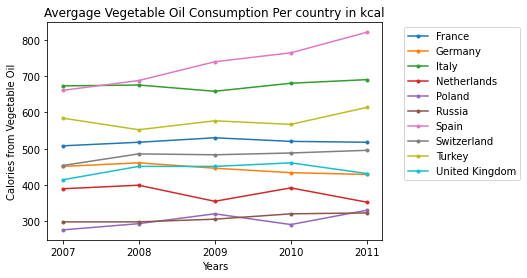

In [36]:
# plt.figure(figsize=(10,5))

plt.title('Avergage Vegetable Oil Consumption Per country in kcal')
plt.ylabel('Calories from Vegetable Oil')
plt.xlabel('Years')
plt.xticks(vcal.index)

for country in vcal:
    plt.plot(vcal.index, vcal[country], marker='.', label=country)
    
plt.legend(bbox_to_anchor=(1.05, 1))

# DPI argument means resolution
# plt.savefig('vegetableOilConsumptionPerCountryInKcal.png', dpi=200, bbox_inches='tight')

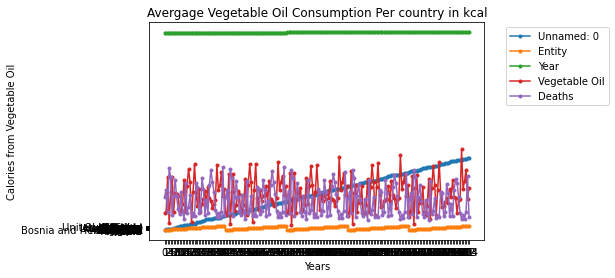

In [4]:
plt.title('Avergage Vegetable Oil Consumption Per country in kcal')
plt.ylabel('Calories from Vegetable Oil')
plt.xlabel('Years')
plt.xticks(euro.index)

for country in euro:
    plt.plot(euro.index, euro[country], marker='.', label=country)
    
plt.legend(bbox_to_anchor=(1.05, 1))

In [18]:
euro.head()

,Entity,Year,Vegetable Oil
0,Albania,2007,172.602740
1,Armenia,2007,182.465753
2,Austria,2007,542.465753
3,Azerbaijan,2007,71.506849
4,Belarus,2007,387.123288


In [6]:
euro.drop(columns=['Unnamed: 0', 'Deaths'], inplace=True)

In [7]:
eurodata = euro.pivot(index='Year', columns='Entity', values='Vegetable Oil')

In [10]:
eurodata

Entity,Albania,Armenia,Austria,Azerbaijan,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,Russia,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
Year,,,,,,,,,,,,,,,,,,,,,
2007,172.602740,182.465753,542.465753,71.506849,387.123288,540.000000,184.931507,374.794521,362.465753,347.917808,...,298.356164,226.849315,263.835616,305.753425,660.821918,401.917808,453.698630,584.383562,345.205479,414.246575
2008,155.342466,175.068493,569.589041,64.109589,382.191781,569.589041,192.328767,256.438356,396.986301,366.410959,...,298.356164,239.178082,263.835616,327.945205,687.945205,404.383562,485.753425,552.328767,360.000000,451.232877
2009,172.602740,175.068493,579.452055,46.849315,323.013699,579.452055,167.671233,396.986301,335.342466,429.041096,...,305.753425,239.178082,295.890411,325.479452,739.726027,404.383562,483.287671,576.986301,357.534247,451.232877
2010,140.547945,182.465753,596.712329,61.643836,377.260274,458.630137,184.931507,308.219178,273.698630,446.301370,...,320.547945,226.849315,303.287671,325.479452,764.383562,411.780822,488.219178,567.123288,340.273973,461.095890
2011,133.150685,192.328767,549.863014,56.712329,429.041096,557.260274,180.000000,310.684932,273.698630,441.369863,...,323.013699,175.068493,303.287671,310.684932,821.095890,416.712329,495.616438,613.972603,315.616438,431.506849


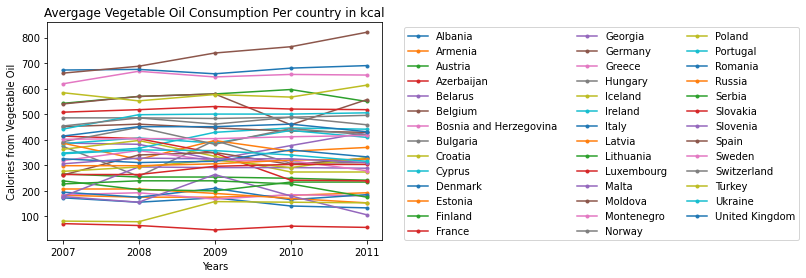

In [13]:
plt.title('Avergage Vegetable Oil Consumption Per country in kcal')
plt.ylabel('Calories from Vegetable Oil')
plt.xlabel('Years')
plt.xticks(eurodata.index)

for country in eurodata:
    plt.plot(eurodata.index, eurodata[country], marker='.', label=country)
    
plt.legend(bbox_to_anchor=(1.05, 1), ncol=3)

In [14]:
eurodata.to_csv('euroalldata.csv')

In [16]:
euro

,Entity,Year,Vegetable Oil
0,Albania,2007,172.602740
1,Armenia,2007,182.465753
2,Austria,2007,542.465753
3,Azerbaijan,2007,71.506849
4,Belarus,2007,387.123288
...,...,...,...
200,Sweden,2011,416.712329
201,Switzerland,2011,495.616438
202,Turkey,2011,613.972603
203,Ukraine,2011,315.616438


In [29]:
euro.drop(columns=['Unnamed: 0'], inplace=True)

In [30]:
euro = pd.merge(euro, hdm)

In [32]:
euro.drop(columns=['Code', 'Unnamed: 0'], inplace=True)

In [34]:
euro.to_csv('EuroWVOMR.csv')